In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve, classification_report

# Classifiers
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
import catboost as cb
import xgboost as xgb

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score 
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score


In [2]:
# Create list of tuples with classifier label and classifier object
classifiers = {}
classifiers.update({"AdaBoost": AdaBoostClassifier()})
classifiers.update({"Bagging": BaggingClassifier()})
classifiers.update({"Gradient Boosting": GradientBoostingClassifier()})
classifiers.update({"Random Forest": RandomForestClassifier()})
classifiers.update({"KNN": KNeighborsClassifier()})
classifiers.update({"MLP": MLPClassifier()})
classifiers.update({"NuSVC": NuSVC()})
classifiers.update({"DTC": DecisionTreeClassifier()})
classifiers.update({"Catboost": cb.CatBoostClassifier()})
classifiers.update({"XGB": xgb.XGBClassifier(objective="binary:logistic", random_state=42)})

In [3]:
# Initiate parameter grid
parameters = {}

# Update dict with AdaBoost
parameters.update({"AdaBoost": { 
                                "classifier__base_estimator": [DecisionTreeClassifier()],
                                "classifier__n_estimators": [200],
                                "classifier__learning_rate": [0.5]
                                 }})

# Update dict with Bagging
parameters.update({"Bagging": { 
                                "classifier__base_estimator": [DecisionTreeClassifier()],
                                "classifier__n_estimators": [200],
                                "classifier__n_jobs": [-1]
                                }})

# Update dict with Gradient Boosting
parameters.update({"Gradient Boosting": { 
                                        "classifier__learning_rate":[0.05], 
                                        "classifier__n_estimators": [200],
                                        "classifier__max_depth": [5],
                                        "classifier__min_samples_split": [0.05],
                                        "classifier__min_samples_leaf": [0.05],
                                        "classifier__max_features": ["log2"],
                                        "classifier__subsample": [0.8]
                                         }})


# Update dict with Random Forest Parameters
parameters.update({"Random Forest": { 
                                    "classifier__n_estimators": [200],
                                    "classifier__class_weight": ["balanced"],
                                    "classifier__max_features": ["auto"],
                                    "classifier__max_depth" : [6],
                                    "classifier__min_samples_split": [0.005],
                                    "classifier__min_samples_leaf": [0.005],
                                    "classifier__criterion" :["entropy"]     ,
                                    "classifier__n_jobs": [-1]
                                     }})


# Update dict with K Nearest Neighbors Classifier
parameters.update({"KNN": { 
                            "classifier__n_neighbors": [29],
                            "classifier__p": [1],
                            "classifier__leaf_size": [5],
                            "classifier__n_jobs": [-1]
                             }})


# Update dict with MLPClassifier
parameters.update({"MLP": { 
                            "classifier__hidden_layer_sizes": [ (10,10,10)],
                            "classifier__activation": ["relu"],
                            "classifier__learning_rate": ["invscaling"],
                            "classifier__max_iter": [200],
                            "classifier__alpha": [1e-06],
                             }})



parameters.update({"NuSVC": { 
                            "classifier__nu": [0.50],
                            "classifier__kernel": ["rbf"],
                            "classifier__degree": [1],
                             }})

# Update dict with Decision Tree Classifier
parameters.update({"DTC": { 
                            "classifier__criterion" :[ "entropy"],
                            "classifier__splitter": ["best"],
                            "classifier__class_weight": [None],
                            "classifier__max_features": ["auto"],
                            "classifier__max_depth" : [7],
                            "classifier__min_samples_split": [0.005],
                            "classifier__min_samples_leaf": [0.01],
                             }})


parameters.update({"Catboost": {
                            'classifier__depth': [10],
                            'classifier__iterations': [300],
                            'classifier__l2_leaf_reg': [9],
                            'classifier__learning_rate': [0.03]}})

parameters.update({"XGB": {
                            'classifier__colsample_bytree': [0.8],
                             'classifier__gamma': [0.1],
                             'classifier__max_depth': [5],
                             'classifier__min_child_weight': [1],
                             'classifier__reg_alpha': [0.01],
                             'classifier__subsample': [0.8]}})

In [4]:
df = pd.read_csv("promisin_couples.csv")
#df.replace(to_replace = -1 , value =np.nan)

X = df.iloc[:, 1:138].values
y = df.iloc[:, 139].values

#imputing missing values
from sklearn.impute import KNNImputer
imputer = KNNImputer()
#imputer = Imputer(missing_values = 'NaN', strategy = 'most_frequent', axis = 0)
imputer.fit(X[:, 1:138])
X[:, 1:138] = imputer.transform(X[:, 1:138])

#Making all the values discrete
from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
X = est.fit_transform(X)

C:\Users\Hannah\Anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:163: UserWarning: Feature 125 is constant and will be replaced with 0.
  "replaced with 0." % jj)
C:\Users\Hannah\Anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:163: UserWarning: Feature 131 is constant and will be replaced with 0.
  "replaced with 0." % jj)
C:\Users\Hannah\Anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:163: UserWarning: Feature 132 is constant and will be replaced with 0.
  "replaced with 0." % jj)
C:\Users\Hannah\Anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:163: UserWarning: Feature 133 is constant and will be replaced with 0.
  "replaced with 0." % jj)
C:\Users\Hannah\Anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:163: UserWarning: Feature 134 is constant and will be replaced with 0.
  "replaced with 0." % jj)
C:\Users\Hannah\Anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:

In [5]:
#chi square based feauture selection
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
chi2_selector = SelectKBest(chi2, k=20)
X = chi2_selector.fit_transform(X, y)
dfe = pd.DataFrame(X)
print(chi2_selector.scores_)
for col in dfe.columns:
    print(col)
print(dfe)

[1.59746576e+00 1.74791158e+00 6.56599204e-01 2.26369518e+01
 4.79849073e+01 2.20547595e+01 1.08488785e+02 7.03976246e+02
 1.65068950e+00 5.86240800e+01 1.31961805e+02 4.33863893e+01
 4.95211447e-01 4.82780959e+00 1.58015209e+02 7.50244878e+01
 4.00062858e+00 3.05852319e+02 3.24567472e+01 1.89734425e+01
 2.89675496e+01 1.81098840e+01 1.18068738e+00 2.46335344e+02
 1.42508789e+00 1.25638303e+00 9.85155073e+00 9.84904513e-01
 3.37648411e+00 1.47006462e+00 2.30184401e+03 3.54376062e+01
 6.54920813e+01 6.93387715e+00 3.25520843e+01 2.46885763e+02
 1.12698884e+02 2.47640391e+02 5.78694904e-01 4.17272968e+00
 2.83909454e+00 4.68702378e+00 1.90245911e+00 5.69558251e+00
 2.71382379e-01 3.24056949e+01 1.78830029e+01 3.88553966e+01
 1.36185312e+01 3.52996366e+01 3.59327285e+01 2.25920027e+01
 5.59735808e-01 2.47678656e+00 1.99306245e+01 1.73679093e+01
 3.61922391e+00 8.02336864e+00 1.03222141e+00 3.70267437e+01
 2.27323488e+02 1.04898077e-02 2.34311753e+01 7.81813774e+00
 5.61674491e+01 2.101947

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,
                                                    random_state = 1000)

In [9]:


###############################################################################
#                       13. Classifier Training and Evaluation                  #
###############################################################################
# Initialize dictionary to store results
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
results = pd.DataFrame(columns = ["Classifiers", "Best Parameters"
              "Training AUC",
              "Test AUC",
              "Accuracy",
              "F-Measure",
               "Report"                   
                        ])

# Tune and evaluate classifiers
for classifier_label, classifier in classifiers.items():
    # Print message to user
    print(f"Now tuning {classifier_label}.")
    
    # Scale features via Z-score normalization
    scaler = StandardScaler()
    
    # Define steps in pipeline
    steps = [("scaler", scaler), ("classifier", classifier)]
    
    # Initialize Pipeline object
    pipeline = Pipeline(steps = steps)
      
    # Define parameter grid
    param_grid = parameters[classifier_label]
    
    # Initialize GridSearch object
    gscv = GridSearchCV(pipeline, param_grid, cv = 10,  n_jobs= -1, verbose = 1, scoring = "roc_auc")
                      
    # Fit gscv
    gscv.fit(X_train, np.ravel(y_train))  
    clf = gscv.best_estimator_
    y_pred = clf.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    
    
    result_table = result_table.append({'classifiers':classifier_label,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
    
    # Evaluate model
    auc = metrics.roc_auc_score(y_test, y_pred)
    #report = classification_report(y_test, y_pred)
    
    # Save results
    results = results.append({"Classifier": classifier_label,
              "Best Parameters": gscv.best_params_,
              "Training AUC": gscv.best_score_,
              "Test AUC": auc,
              "Accuracy": accuracy_score(y_test, y_pred),
              "F-Measure": f1_score(y_test, y_pred, average = 'weighted'),
              "Report": classification_report(y_test, y_pred, digits=3)
                             }, ignore_index = True)



Now tuning AdaBoost.
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   23.6s finished


Now tuning Bagging.
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.1s finished


Now tuning Gradient Boosting.
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.5s finished


Now tuning Random Forest.
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.3s finished


Now tuning KNN.
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.5s finished


Now tuning MLP.
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   10.2s finished
C:\Users\Hannah\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Now tuning NuSVC.
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.8s finished


Now tuning DTC.
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Now tuning Catboost.


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  5.3min finished


0:	learn: 0.6761288	total: 1.03s	remaining: 5m 6s
1:	learn: 0.6606793	total: 1.75s	remaining: 4m 20s
2:	learn: 0.6376896	total: 3.3s	remaining: 5m 26s
3:	learn: 0.6267152	total: 3.55s	remaining: 4m 22s
4:	learn: 0.6073590	total: 4.18s	remaining: 4m 6s
5:	learn: 0.5883036	total: 4.75s	remaining: 3m 52s
6:	learn: 0.5677874	total: 5.15s	remaining: 3m 35s
7:	learn: 0.5552358	total: 5.43s	remaining: 3m 18s
8:	learn: 0.5390461	total: 5.84s	remaining: 3m 8s
9:	learn: 0.5295466	total: 5.94s	remaining: 2m 52s
10:	learn: 0.5139685	total: 6.04s	remaining: 2m 38s
11:	learn: 0.5008690	total: 6.63s	remaining: 2m 39s
12:	learn: 0.4907409	total: 6.74s	remaining: 2m 28s
13:	learn: 0.4856657	total: 6.87s	remaining: 2m 20s
14:	learn: 0.4743872	total: 7.03s	remaining: 2m 13s
15:	learn: 0.4667318	total: 7.25s	remaining: 2m 8s
16:	learn: 0.4612300	total: 7.49s	remaining: 2m 4s
17:	learn: 0.4547594	total: 8.19s	remaining: 2m 8s
18:	learn: 0.4504432	total: 8.36s	remaining: 2m 3s
19:	learn: 0.4422914	total: 8.

159:	learn: 0.3055854	total: 49.3s	remaining: 43.1s
160:	learn: 0.3054034	total: 49.4s	remaining: 42.7s
161:	learn: 0.3053163	total: 49.5s	remaining: 42.1s
162:	learn: 0.3051038	total: 49.6s	remaining: 41.7s
163:	learn: 0.3050564	total: 49.7s	remaining: 41.2s
164:	learn: 0.3044384	total: 50.3s	remaining: 41.2s
165:	learn: 0.3044373	total: 50.4s	remaining: 40.7s
166:	learn: 0.3043790	total: 50.5s	remaining: 40.2s
167:	learn: 0.3043306	total: 50.6s	remaining: 39.8s
168:	learn: 0.3038578	total: 51.3s	remaining: 39.7s
169:	learn: 0.3037315	total: 51.4s	remaining: 39.3s
170:	learn: 0.3035998	total: 51.6s	remaining: 38.9s
171:	learn: 0.3035543	total: 51.9s	remaining: 38.6s
172:	learn: 0.3033295	total: 52s	remaining: 38.2s
173:	learn: 0.3033220	total: 52s	remaining: 37.7s
174:	learn: 0.3032991	total: 52.1s	remaining: 37.2s
175:	learn: 0.3032928	total: 52.2s	remaining: 36.8s
176:	learn: 0.3030325	total: 52.4s	remaining: 36.4s
177:	learn: 0.3030003	total: 52.4s	remaining: 35.9s
178:	learn: 0.30

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   27.8s finished


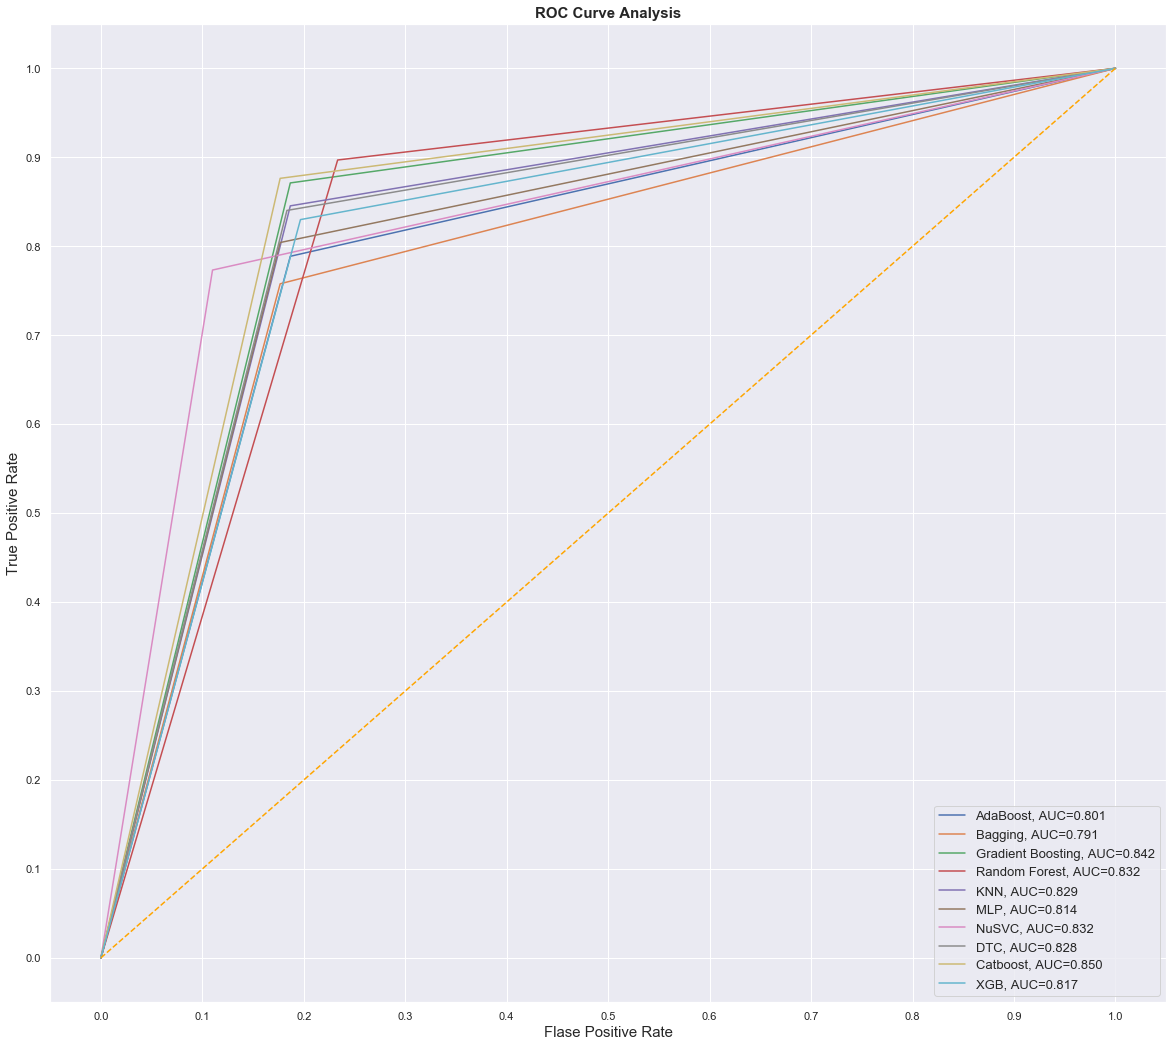

In [10]:
#generating curve
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')



# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(20,18))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()
fig.savefig('multiple_roc_curve(chi_2(20))final.png')

In [11]:
results.to_csv('Accuracy(chi_2(20))final.csv')